In [1]:
# Clark Mollencop
# analyzing the Senegal network with the 3 edge motif counts
# Summer 2022

In [2]:
import pandas as pd
import seaborn as sns
import subprocess # to call the C++ executable that actually does the network analysis
import glob # to work with files later on
import bidirec_script # for input/formatting

In [3]:
#### this cell: convert Senegal network to correct format ####
df = pd.read_csv('networks/senegal.txt', sep=',', usecols=['source', 'target', 'month'])
df.columns = ['timestamp', 'source_id', 'dest_id']
cols = df.columns.tolist()
time = cols[0]
cols.pop(0)
cols.append(time)
df = df[cols]
dfs_all_deltas = []
for i in range(1, 13):
    dfs_all_deltas.append(bidirec_script.dup_edges(df, i, 12))
# now save all of these to files for analysis
for d in range(len(dfs_all_deltas)):
    dfs_all_deltas[d].to_csv(path_or_buf= 'input/senegal_d_{num}.txt'.format(num=d+1), sep=' ', header=False, index=False)

In [4]:
# run the C++ file on the correct Nepal net
for i in range(1, 13):
    process = subprocess.Popen(["./FAST_temporal_motif", "-input", "input/senegal_d_{num}.txt".format(num=i), "-output", "output/senegal_out_d_{num}.txt".format(num=i), "-timesOut", "output/senegal_times_d_{num}.txt".format(num=i), "-w", "{num}".format(num=i)])

edgeNum: 361
inserting...
sorting...
loaded file
edgeNum: 390
inserting...
sorting...
loaded file
edgeNum: 418
inserting...
sorting...
loaded file
edgeNum: 446
inserting...
sorting...
loaded file
edgeNum: 474
inserting...
sorting...
loaded file
edgeNum: 502
inserting...
sorting...
loaded file
edgeNum: 528
inserting...
sorting...
loaded file
edgeNum: 554
inserting...
sorting...
loaded file
edgeNum: 580
inserting...
sorting...
loaded file
edgeNum: 606
inserting...
sorting...
loaded file
edgeNum: 635
inserting...
sorting...
loaded file
edgeNum: 664
inserting...
sorting...
loaded file


In [5]:
# then get that output, save it as a dateframe appropriately for analysis
# list of dataframes of the outputs for analysis
# cols: column 1: motif number (0-36), column 2: time at which the motif occurred
# column 3: count of how many times that motif occurred at that time
# column4: delta within which we were counting
df_times = []
for name in glob.glob("output/senegal_times_d_?*.txt"):
    sngraph = pd.read_csv(name)
    df_times.append(sngraph)
df_times = pd.concat(df_times)
print(df_times)

     motif  time  count  delta
0        0     1    909     11
1        0     2    915     11
2        0     3    715     11
3        0     4    716     11
4        0     5    721     11
..     ...   ...    ...    ...
427     35     8     15      4
428     35     9     16      4
429     35    10     16      4
430     35    11     15      4
431     35    12     14      4

[5184 rows x 4 columns]


In [6]:
# finally graph the output for the motifs
df_times = df_times.groupby(['motif', 'time', 'delta']).sum().reset_index()
print(df_times)

      motif  time  delta  count
0         0     1      1     28
1         0     1      2     34
2         0     1      3     97
3         0     1      4    152
4         0     1      5    233
...     ...   ...    ...    ...
5179     35    12      8     66
5180     35    12      9     81
5181     35    12     10    100
5182     35    12     11    120
5183     35    12     12    144

[5184 rows x 4 columns]


In [7]:
# add matrix position colums to make plotting look better and correspond with motif matrix
df_times['c'] = df_times.apply(lambda row: row.motif % 6, axis = 1)
df_times['r'] = df_times.apply(lambda row: row.motif // 6, axis = 1)
print(df_times)

      motif  time  delta  count  c  r
0         0     1      1     28  0  0
1         0     1      2     34  0  0
2         0     1      3     97  0  0
3         0     1      4    152  0  0
4         0     1      5    233  0  0
...     ...   ...    ...    ... .. ..
5179     35    12      8     66  5  5
5180     35    12      9     81  5  5
5181     35    12     10    100  5  5
5182     35    12     11    120  5  5
5183     35    12     12    144  5  5

[5184 rows x 6 columns]


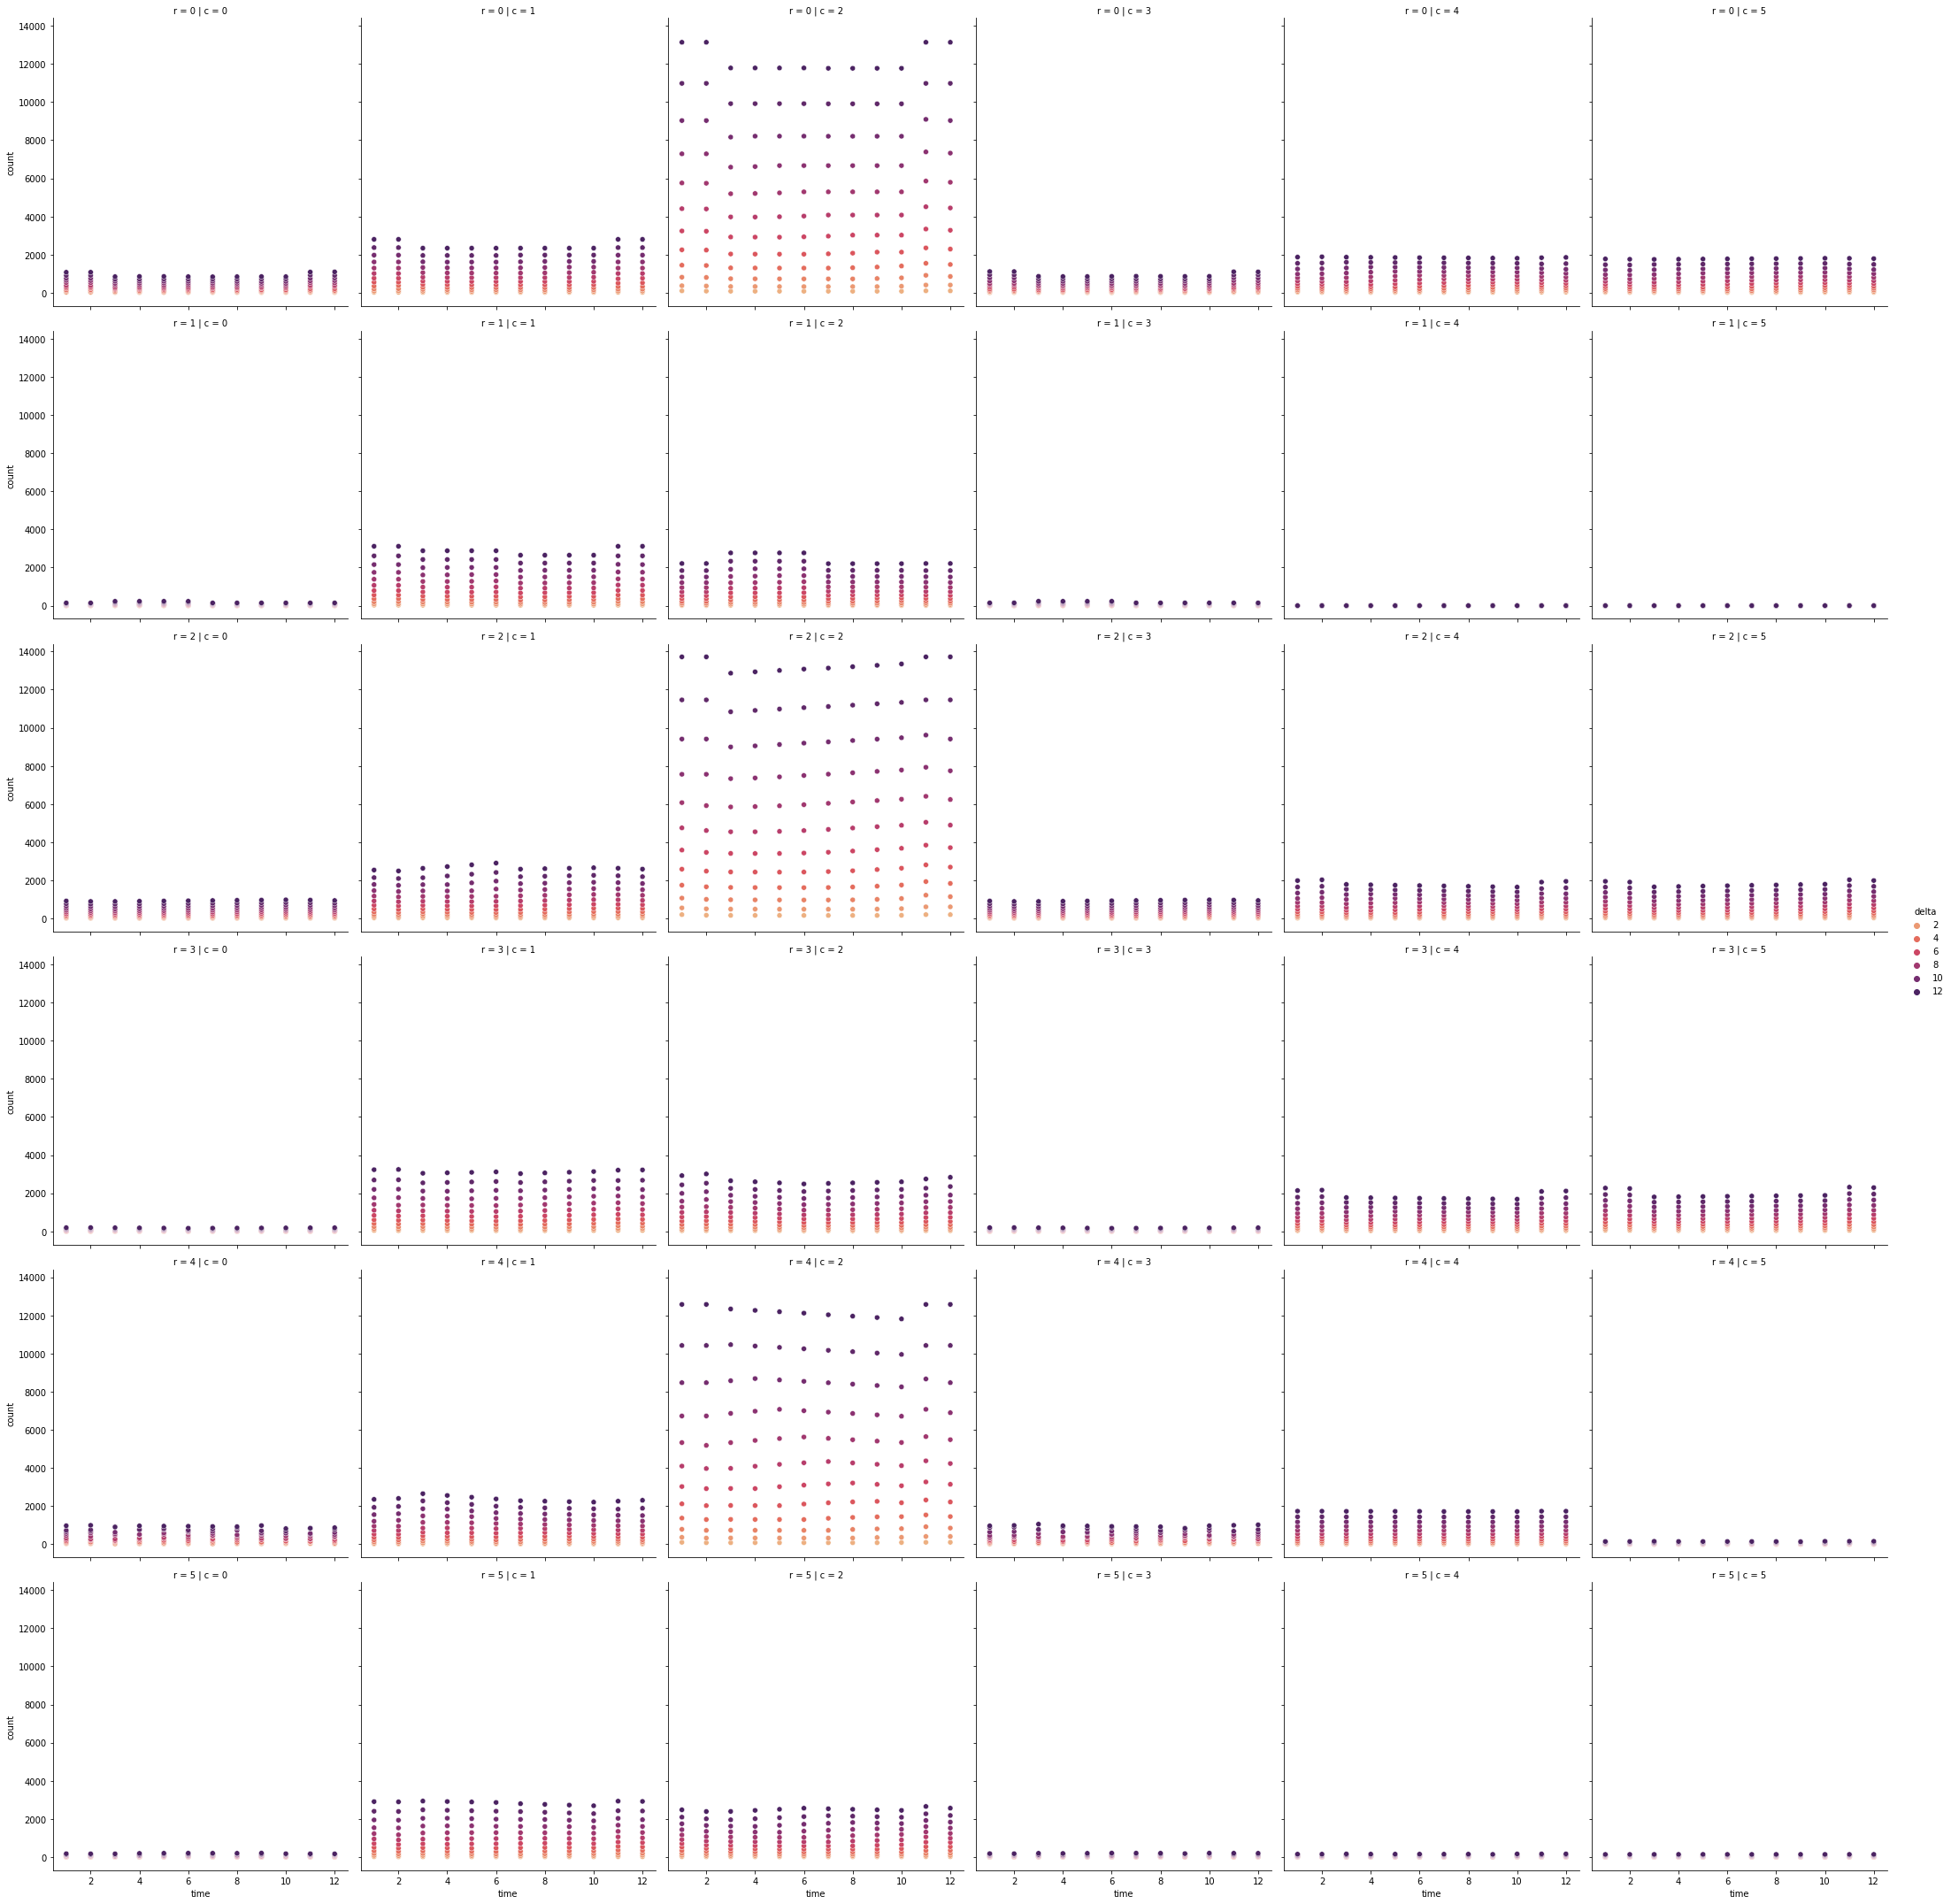

In [8]:
# now, use relplot to plot temporal motif counts for all motifs
graph = sns.relplot(data=df_times, x='time', y='count', hue='delta', col='c', row='r', palette=sns.color_palette("flare", as_cmap=True))